In [1]:
import numpy as np
import pandas as pd 
from imblearn.over_sampling import SMOTE


In [2]:
df = pd.read_csv('dataset2csv.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [7]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [8]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [9]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [10]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [ ]:
df2=scaler.fit_transform(df)
df2=pd.DataFrame(df2)

In [ ]:
import joblib
scaler_filename = "scaler.save"
joblib.dump(scaler, scaler_filename) 
  

In [12]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

In [13]:
print('clasee 1 => ',sum(y_test==1))
print('clasee 0 => ',sum(y_test==0))
print('X_train =>',X_test.shape)

clasee 1 =>  407
clasee 0 =>  1593
X_train => (2000, 11)


In [ ]:
import seaborn as sns
sns.countplot(y_train)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_scale=pd.DataFrame(scaler.fit_transform(X_train))
X_test_scale=pd.DataFrame(scaler.transform(X_test))

In [15]:
import joblib
scaler_filename = "scaler.save"
joblib.dump(scaler, scaler_filename) 

['scaler.save']

In [21]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train_scale, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 1630
Before OverSampling, counts of label '0': 6370 

After OverSampling, the shape of train_X: (12740, 11)
After OverSampling, the shape of train_y: (12740,) 

After OverSampling, counts of label '1': 6370
After OverSampling, counts of label '0': 6370


In [ ]:
print(X_train.iloc[1])


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [ ]:
X_train_trf.shape


In [17]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn.metrics import confusion_matrix, classification_report

In [18]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dropout(0.2))
model.add(Dense(6,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dropout (Dropout)           (None, 11)                0         
                                                                 
 dense_1 (Dense)             (None, 6)                 72        
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 dense_2 (Dense)             (None, 3)                 21        
                                                                 
 dropout_2 (Dropout)         (None, 3)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 4

In [22]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [45]:
history = model.fit(X_train_res,y_train_res,batch_size=34,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
300/300 [==============================] - 2s 5ms/step - loss: 0.4951 - accuracy: 0.7647 - val_loss: 0.6694 - val_accuracy: 0.6060
Epoch 2/100
300/300 [==============================] - 1s 4ms/step - loss: 0.4933 - accuracy: 0.7674 - val_loss: 0.6226 - val_accuracy: 0.6413
Epoch 3/100
300/300 [==============================] - 1s 4ms/step - loss: 0.4911 - accuracy: 0.7695 - val_loss: 0.6216 - val_accuracy: 0.6507
Epoch 4/100
300/300 [==============================] - 1s 4ms/step - loss: 0.4986 - accuracy: 0.7643 - val_loss: 0.6555 - val_accuracy: 0.6138
Epoch 5/100
300/300 [==============================] - 1s 4ms/step - loss: 0.4961 - accuracy: 0.7662 - val_loss: 0.6629 - val_accuracy: 0.6111
Epoch 6/100
300/300 [==============================] - 1s 5ms/step - loss: 0.4907 - accuracy: 0.7668 - val_loss: 0.6071 - val_accuracy: 0.6468
Epoch 7/100
300/300 [==============================] - 1s 3ms/step - loss: 0.4989 - accuracy: 0.7682 - val_loss: 0.6597 - val_accuracy: 0.6130

Epoch 58/100
300/300 [==============================] - 1s 4ms/step - loss: 0.4850 - accuracy: 0.7746 - val_loss: 0.6197 - val_accuracy: 0.6205
Epoch 59/100
300/300 [==============================] - 1s 3ms/step - loss: 0.4781 - accuracy: 0.7763 - val_loss: 0.5941 - val_accuracy: 0.6468
Epoch 60/100
300/300 [==============================] - 1s 3ms/step - loss: 0.4850 - accuracy: 0.7714 - val_loss: 0.6436 - val_accuracy: 0.6115
Epoch 61/100
300/300 [==============================] - 1s 3ms/step - loss: 0.4841 - accuracy: 0.7749 - val_loss: 0.6096 - val_accuracy: 0.6330
Epoch 62/100
300/300 [==============================] - 1s 3ms/step - loss: 0.4870 - accuracy: 0.7731 - val_loss: 0.6005 - val_accuracy: 0.6330
Epoch 63/100
300/300 [==============================] - 1s 3ms/step - loss: 0.4818 - accuracy: 0.7732 - val_loss: 0.5893 - val_accuracy: 0.6436
Epoch 64/100
300/300 [==============================] - 1s 3ms/step - loss: 0.4780 - accuracy: 0.7744 - val_loss: 0.5871 - val_accuracy:

In [46]:
y_pred = model.predict(X_test_scale)

In [47]:
y_pred

array([[0.44297487],
       [0.24496949],
       [0.11413774],
       ...,
       [0.10081372],
       [0.9999912 ],
       [0.15878317]], dtype=float32)

In [48]:
y_pred = np.where(y_pred>0.5,1,0)
y_pred[:10]

array([[0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [49]:
y_test[:10]

array([1, 0, 0, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.838

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1593
           1       0.60      0.59      0.60       407

    accuracy                           0.84      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.84      0.84      0.84      2000



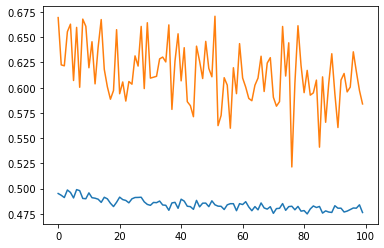

In [52]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

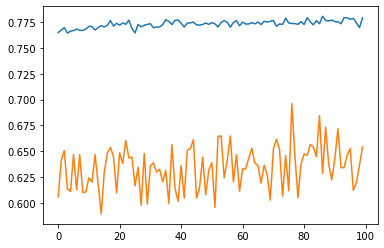

In [53]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
from keras.models import load_model
loaded_model = load_model("network.h5")
y_pred = loaded_model.predict(X_test)
y_pred_scale = np.where(y_pred>0.5,1,0)
y_pred_scale[:10]

In [ ]:
y_test[:10]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_scale)

In [ ]:
print(classification_report(y_test, y_pred_scale))